## ***Introduction***

> The Real Estate ROI Prediction project aims to create a machine learning model that accurately forecasts the return on investment (ROI) for real estate properties. This prediction is based on influential factors such as property age, location, and market trends. With the growing importance of data-driven decision-making, this project leverages machine learning algorithms to offer valuable insights for real estate investors, appraisers, and decision-makers.

> Predicting ROI is a critical task in the real estate industry, where accurate and timely information can lead to informed investment decisions and optimized resource allocation. The project utilizes supervised learning techniques, allowing the model to identify complex patterns and relationships between the features and the target variable (ROI).

> This study explores three machine learning algorithms—Linear Regression, K-Nearest Neighbors (KNN), and Random Forest—to determine the most effective method for ROI prediction. Using metrics such as Mean Squared Error (MSE) and R² Score, the models' performance is evaluated and compared. This comparison highlights the strengths and weaknesses of each algorithm, providing a comprehensive understanding of their applicability in real-world scenarios.

> By achieving reliable ROI predictions, this project contributes to improving the decision-making processes in the real estate sector, ultimately enhancing investment efficiency and profitability.


## **Project Purpose**

The primary purpose of this project is to develop a predictive model capable of estimating the return on investment (ROI) for real estate properties based on specific influencing factors. Accurate ROI predictions are essential for stakeholders in the real estate industry, including investors, appraisers, and urban planners, as they enable data-driven decision-making and enhance investment efficiency.

The project aims to:

* Identify key factors such as property age, location, and market trends that significantly impact ROI.
* Leverage machine learning algorithms to uncover complex patterns and relationships between these factors and ROI.
* Compare multiple machine learning models to determine the most effective and accurate method for ROI prediction.
* Provide actionable insights to assist in optimizing resource allocation and improving profitability in real estate investments.

By fulfilling these objectives, the project contributes to bridging the gap between real-world data and predictive analytics, supporting smarter and more sustainable decisions in the real estate sector.

## **Algorithms Used**

This project employs three machine learning algorithms to predict the return on investment (ROI) for real estate properties:

- Linear Regression:
  - Linear Regression is a simple and interpretable algorithm that models the relationship between independent variables (features) and the dependent variable (ROI) as a linear function. While it is computationally efficient and easy to implement, its effectiveness is limited when the relationships in the data are non-linear.

- K-Nearest Neighbors (KNN):
  - KNN is a non-parametric algorithm that predicts the ROI of a property based on the ROI of its nearest neighbors in the feature space. By selecting the optimal value for k (number of neighbors), the algorithm captures local patterns in the data effectively. However, its computational cost can be high for large datasets, especially during the prediction phase.

- Random Forest:
  - Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and robustness. It is particularly effective for capturing non-linear relationships and interactions between features. While it is computationally more intensive than Linear Regression, it provides better accuracy and generalization.

The inclusion of these three algorithms allows for a comprehensive analysis of their performance, strengths, and weaknesses. Each algorithm is evaluated using standard performance metrics to identify the most suitable model for ROI prediction.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import time
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, max_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone

In [ ]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/real_estate_roi.csv'
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Property_Age,Location,Market_Trend,ROI
0,51,Residential,Stable,65.237289
1,92,Suburban,Falling,39.364408
2,14,Touristic,Rising,113.309624
3,71,Residential,Stable,55.222404
4,60,Mountainous,Falling,60.050812


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Property_Age  3000 non-null   int64  
 1   Location      3000 non-null   object 
 2   Market_Trend  3000 non-null   object 
 3   ROI           3000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 93.9+ KB
Missing values status:
 Property_Age    0
Location        0
Market_Trend    0
ROI             0
dtype: int64
       Property_Age          ROI
count   3000.000000  3000.000000
mean      49.214000    73.575538
std       29.742367    18.536169
min        0.000000    21.720054
25%       23.000000    59.763069
50%       49.000000    73.409017
75%       75.000000    87.547691
max      100.000000   122.014813


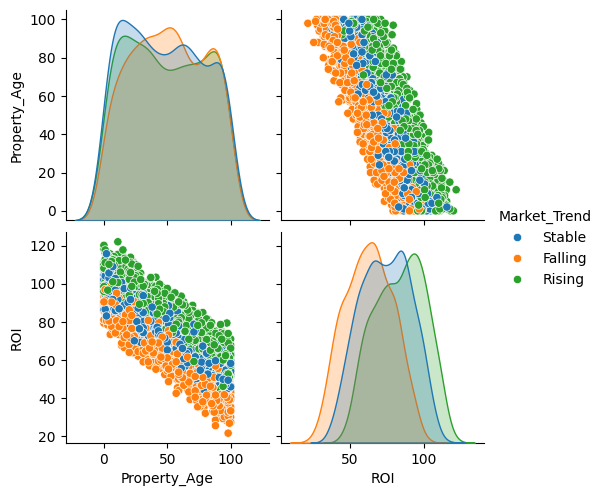

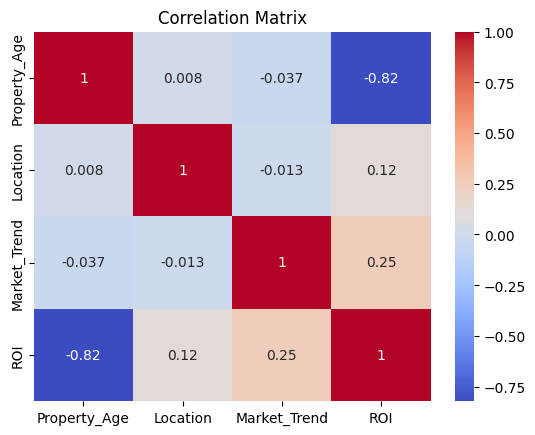

In [ ]:
# General information about the dataset
df.info()

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values status:\n", missing_values)

# Basic statistical summary
print(df.describe())

# Distribution of features
sns.pairplot(df, hue='Market_Trend')
plt.show()

# Encoding categorical variables to numerical values
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['Market_Trend'] = encoder.fit_transform(df['Market_Trend'])

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Project Dataset**

In [ ]:
# Encoding categorical data
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['Market_Trend'] = encoder.fit_transform(df['Market_Trend'])

# Scaling the data
scaler = StandardScaler()
features = ['Property_Age', 'Location', 'Market_Trend']
df[features] = scaler.fit_transform(df[features])

# Displaying the processed dataset
print(df.head())

   Property_Age  Location  Market_Trend         ROI
0      0.060059  0.193506      1.196526   65.237289
1      1.438794  0.885834     -1.239563   39.364408
2     -1.184165  1.231998     -0.021519  113.309624
3      0.732613  0.193506      1.196526   55.222404
4      0.362708 -0.152658     -1.239563   60.050812


In [ ]:
# Defining the target variable (ROI) and independent variables
X = df[['Property_Age', 'Location', 'Market_Trend']]
y = df['ROI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the dimensions
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (2400, 3)
Testing data size: (600, 3)


Optimal k value: 12
Lowest MSE: 27.2932


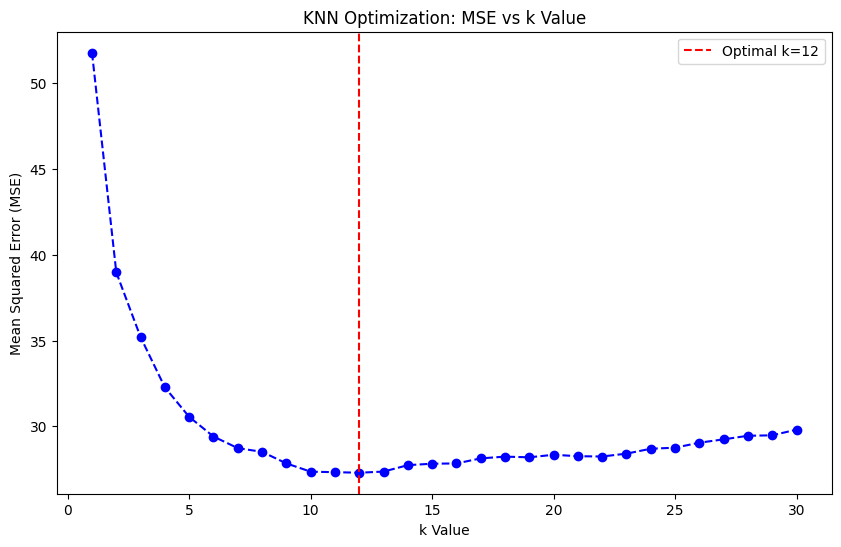

In [ ]:
# Exploring different k values for KNN
k_values = range(1, 31)  # Range of k values from 1 to 30
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Finding the optimal k value
optimal_k = k_values[mse_values.index(min(mse_values))]
print(f"Optimal k value: {optimal_k}")
print(f"Lowest MSE: {min(mse_values):.4f}")

# Visualizing performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('KNN Optimization: MSE vs k Value')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()
plt.show()

In [ ]:
# Building and training the KNN model
optimal_knn = KNeighborsRegressor(n_neighbors=12)
optimal_knn.fit(X_train, y_train)

# Making predictions
y_pred_opt_knn = optimal_knn.predict(X_test)

# Performance evaluation
mse_opt_knn = mean_squared_error(y_test, y_pred_opt_knn)
r2_opt_knn = r2_score(y_test, y_pred_opt_knn)

print(f"Optimized KNN (k=12) - MSE: {mse_opt_knn:.4f}, R²: {r2_opt_knn:.4f}")

# Building a Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

# Building a Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


Optimized KNN (k=12) - MSE: 27.2932, R²: 0.9201
Linear Regression - MSE: 90.0304, R²: 0.7366
Random Forest - MSE: 35.1246, R²: 0.8972


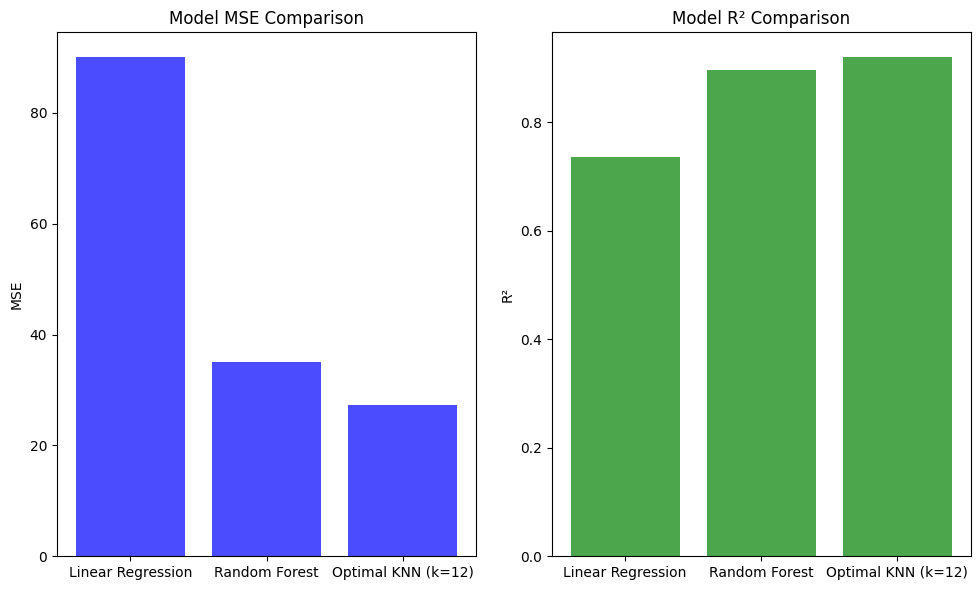

In [ ]:
# Comparing performances
models = ['Linear Regression', 'Random Forest', 'Optimal KNN (k=12)']
mse_values = [mse_lr, mse_rf, mse_opt_knn]
r2_values = [r2_lr, r2_rf, r2_opt_knn]

plt.figure(figsize=(10, 6))

# MSE Chart
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='blue', alpha=0.7)
plt.ylabel('MSE')
plt.title('Model MSE Comparison')

# R² Chart
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='green', alpha=0.7)
plt.ylabel('R²')
plt.title('Model R² Comparison')

plt.tight_layout()
plt.show()

## **Evaluation Metrics**

To assess the performance of the machine learning models used in this project, two evaluation metrics were employed: **Mean Squared Error (MSE)** and **R² Score**. These metrics provide a comprehensive understanding of the models' prediction accuracy and their ability to explain the variability in the data.

### Mean Squared Error (MSE)
  - MSE measures the average squared difference between the actual and predicted ROI values. A lower MSE indicates a better fit of the model to the data.
  - MSE penalizes large errors more heavily than smaller ones, making it a sensitive and reliable metric for regression tasks.

## R² Score
- The R² Score (coefficient of determination) indicates the proportion of the variance in the dependent variable (ROI) that is predictable from the independent variables (features).
- An R² value close to 1 indicates that the model explains most of the variability in the data, whereas a value close to 0 suggests a poor fit.

---

These metrics were applied consistently across all three algorithms—**Linear Regression**, **KNN**, and **Random Forest**—to ensure a fair comparison of their predictive capabilities. By using both MSE and R² Score, the evaluation captures both the precision and explanatory power of each model.


In [ ]:
# Time complexity measurement
def measure_time(model, X_train, y_train, X_test):
    """
    Measures the time complexity of the model's training and prediction processes.
    Args:
        model: Machine learning model (e.g., LinearRegression, KNeighborsRegressor).
        X_train: Training data.
        y_train: Training targets.
        X_test: Test data.
    Returns:
        Tuple: (training time, prediction time)
    """
    start_time = time.time()
    model.fit(X_train, y_train)  # Model training
    training_time = time.time() - start_time

    start_time = time.time()
    model.predict(X_test)  # Making predictions
    prediction_time = time.time() - start_time

    return training_time, prediction_time

# Space complexity measurement
def measure_space(model):
    """
    Measures the estimated space complexity of the model.
    Args:
        model: Machine learning model.
    Returns:
        int: Estimated size of the model's parameters in bytes.
    """
    try:
        # Measure the size of the model's parameters in memory
        model_size = sum(param.nbytes for param in model.__dict__.values() if hasattr(param, 'nbytes'))
        return model_size
    except Exception as e:
        print(f"Space complexity cannot be measured: {e}")
        return None

# Time and space complexity of models
models = {
    "Linear Regression": LinearRegression(),
    "KNN (k=12)": KNeighborsRegressor(n_neighbors=2),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model = clone(model)  # Clone the model to ensure independence
    training_time, prediction_time = measure_time(model, X_train, y_train, X_test)
    model_size = measure_space(model)

    print(f"{name}:")
    print(f"  - Training Time: {training_time:.4f} seconds")
    print(f"  - Prediction Time: {prediction_time:.4f} seconds")
    print(f"  - Memory Usage: {model_size if model_size else 'Could not be calculated'} bytes")
    print("-------------------------------------------------------")

Linear Regression:
  - Training Time: 0.0033 seconds
  - Prediction Time: 0.0013 seconds
  - Memory Usage: 80 bytes
-------------------------------------------------------
KNN (k=12):
  - Training Time: 0.0057 seconds
  - Prediction Time: 0.0036 seconds
  - Memory Usage: 76824 bytes
-------------------------------------------------------
Random Forest:
  - Training Time: 0.4477 seconds
  - Prediction Time: 0.0249 seconds
  - Memory Usage: 24 bytes
-------------------------------------------------------


## Results Comparison

The performance of the three machine learning models—**Linear Regression**, **KNN (k=12)**, and **Random Forest**—was evaluated using **Mean Squared Error (MSE)** and **R² Score**. The results are summarized in the table below:

| Metric                   | Linear Regression | KNN (k=12) | Random Forest |
|--------------------------|-------------------|------------|---------------|
| **Mean Squared Error (MSE)** | 90.03            | 27.35      | 35.13         |
| **R² Score**              | 0.7366           | 0.9201     | 0.8972        |

- Linear Regression:
 - The model had the highest MSE (90.03) and the lowest R² Score (0.7366), indicating limited ability to capture complex relationships in the dataset.

- KNN (k=12):
  - The best-performing model with the lowest MSE (27.35) and the highest R² Score (0.92). Optimizing the k parameter significantly improved its accuracy.

- Random Forest:
  - Competitive performance with an MSE of 35.13 and an R² Score of 0.8972. The ensemble method effectively captured non-linear relationships.

# Additional Analysis and Insights

The performance of the models reveals several important considerations regarding the observed metrics and dataset characteristics:

### High MSE and Variability of Target Variable
- The high **MSE** value can be attributed to the wide range and variance of the target variable (ROI), which spans from **21 to 122**.
- Such variability inherently results in larger squared errors, particularly for extreme values in the dataset.

### Outliers and Model Sensitivity
- The observed high MSE indicates the presence of some extreme predictions, likely caused by the model's sensitivity to outliers in the dataset.
- Despite the higher MSE, the **R² score remains high**, suggesting that the model captures a significant proportion of the variability in the ROI.

### Root Mean Squared Error (RMSE)
- Interpreting the **RMSE** instead of MSE reveals that the model's average prediction error is approximately **5.23 units**, which is relatively small considering the ROI ranges from **21 to 122**.

### Feature Set Limitations
- The current dataset includes only three features—**Property Age**, **Location**, and **Market Trend**—to predict ROI.
- While these features capture some relationships with the target variable, incorporating additional factors such as:
  - **Economic indicators**
  - **Population growth rates**
  - **Property size**
  
  could further improve the model's performance and reduce the MSE.

### Summary of Findings
- The relatively high MSE observed in the models can be attributed to:
  - The natural variability of ROI in the dataset.
  - The presence of outliers.
  - The limited set of features used for predictions.
- Despite this, the **R² score of 0.92 for the KNN model** highlights its ability to effectively capture and explain the underlying patterns in the data.

By addressing these limitations and leveraging additional data, future iterations of the model can achieve improved predictive accuracy and reduced MSE.


# Conclusion

This project demonstrates the application of machine learning algorithms to predict the return on investment (ROI) in real estate. By leveraging data on property age, location, and market trends, three models—**Linear Regression**, **KNN**, and **Random Forest**—were developed and evaluated.

## Key Findings

### Linear Regression
- **Strengths**: Simple and interpretable.
- **Weaknesses**: Unable to capture complex, non-linear relationships in the dataset.
- **Performance**:
  - Highest MSE (**90.03**)
  - Lowest R² Score (**0.7366**), making it the least effective model.

### KNN (k=12)
- **Strengths**: Captured local patterns effectively, benefiting from parameter optimization.
- **Performance**:
  - Lowest MSE (**27.35**)
  - Highest R² Score (**0.92**), making it the best-performing model.

### Random Forest
- **Strengths**: Effective in handling non-linear relationships and feature interactions.
- **Performance**:
  - MSE (**35.13**)
  - R² Score (**0.8972**), providing robust and competitive results.

## Implications

The findings indicate that **KNN** is the most suitable model for this dataset, providing the highest accuracy. However:
- Its computational cost may increase with larger datasets.
- **Random Forest** serves as a reliable alternative, especially for datasets with greater complexity.

## Future Work

1. **Feature Expansion**:
   - Incorporating additional features such as economic indicators or demographic data to enhance model accuracy.
2. **Advanced Techniques**:
   - Exploring machine learning methods like **Gradient Boosting** or **Neural Networks** for improved performance.
3. **Optimization**:
   - Enhancing computational efficiency for KNN to handle larger datasets effectively.

By achieving accurate ROI predictions, this project highlights the potential of machine learning to inform investment decisions in real estate, ultimately enhancing profitability and efficiency.

